In [14]:
%pip install --user contextily

  Using cached contextily-1.1.0-py3-none-any.whl (24 kB)
  Using cached rasterio-1.2.3.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.2.2.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.2.1.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached rasterio-1.2.0.tar.gz (2.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Gett

  ERROR: Command errored out with exit status 1:
   command: 'C:\Python39\python.exe' 'C:\Users\zegan\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\zegan\AppData\Local\Temp\tmpcp_g29l1'
       cwd: C:\Users\zegan\AppData\Local\Temp\pip-install-oe4x85xj\rasterio_fc7757e71af6419b85667eaf280b7104
  Complete output (2 lines):
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Python39\python.exe' 'C:\Users\zegan\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\pep517\in_process\_in_process.py' get_requires_for_build_wheel 'C:\Users\zegan\AppDat

     command: 'C:\Python39\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\zegan\\AppData\\Local\\Temp\\pip-install-oe4x85xj\\rasterio_487a9dc3a8094cb59f31a210667dc147\\setup.py'"'"'; __file__='"'"'C:\\Users\\zegan\\AppData\\Local\\Temp\\pip-install-oe4x85xj\\rasterio_487a9dc3a8094cb59f31a210667dc147\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\zegan\AppData\Local\Temp\pip-pip-egg-info-vrp57rtc'
         cwd: C:\Users\zegan\AppData\Local\Temp\pip-install-oe4x85xj\rasterio_487a9dc3a8094cb59f31a210667dc147\
    Complete output (2 lines):
    INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
    ERROR: A GDA

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
crime19 = gpd.read_file('data/nypd_complaint_2019_geo.geojson')
crime20 = gpd.read_file('data/nypd_complaint_2020_geo.geojson')


In [3]:
crime19

,boro_cd,shape_area,shape_leng,case_num,geometry
0,101,42689119.0133,74168.5878924,5802,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,102,37689205.9401,34130.5952768,8060,"POLYGON ((-73.99684 40.73736, -73.99362 40.736..."
2,103,46879779.2986,30695.6409632,10309,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
3,104,49311715.1126,67623.6699012,11345,"POLYGON ((-73.99394 40.77318, -73.99370 40.773..."
4,105,43790329.8699,35288.1885095,15522,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
...,...,...,...,...,...
66,502,592715674.432,143044.989836,4847,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ..."
67,503,599053419.389,193564.186317,3286,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ..."
68,595,54734567.3489,110147.254437,40,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ..."
69,203,44803080.7253,33500.8967412,7888,"POLYGON ((-73.88072 40.83752, -73.88074 40.837..."


<IPython.core.display.Javascript object>


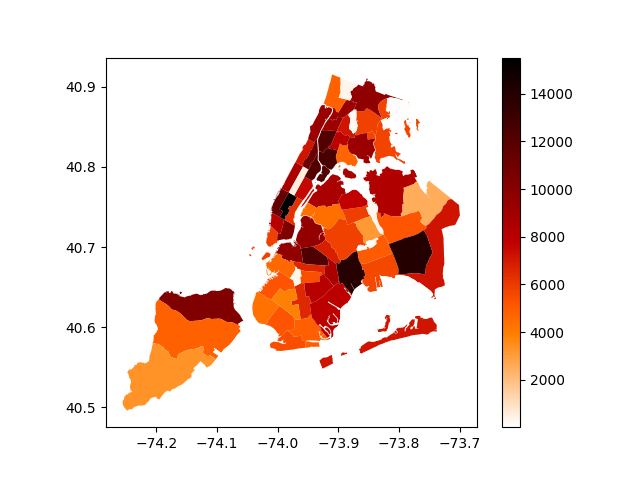

<AxesSubplot:>

In [4]:
crime19.plot(column='case_num', legend=True, cmap='gist_heat_r')

<IPython.core.display.Javascript object>


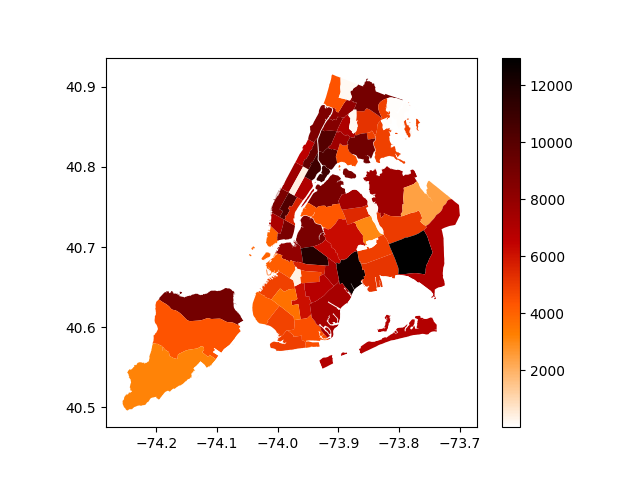

<AxesSubplot:>

In [5]:
crime20.plot(column='case_num', legend=True, cmap='gist_heat_r', missing_kwds={
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing values"})

## Relative Crime Index
Since the data is not comprehensive(there are approximate 950,000 crimes for year 2019 and 2020), we cannot directly compare numbers between this two dataframe. Thus, we use relative crime index instead, which is RCI = case_num / mean(case_num).

In [6]:
mean20 = crime20['case_num'].mean()
crime20['RCI'] = crime20['case_num'] / mean20
crime20['RCI']

0     0.699789
1     1.248045
2     1.546025
3     1.537431
4     1.791390
        ...   
66    0.767663
67    0.556850
68    0.005963
69    1.335738
70    1.606709
Name: RCI, Length: 71, dtype: float64

In [7]:
mean19 = crime19['case_num'].mean()
crime19['RCI'] = crime19['case_num'] / mean19
crime19['RCI']

0     0.913522
1     1.269044
2     1.623148
3     1.786266
4     2.443932
        ...   
66    0.763158
67    0.517379
68    0.006298
69    1.241962
70    1.454047
Name: RCI, Length: 71, dtype: float64

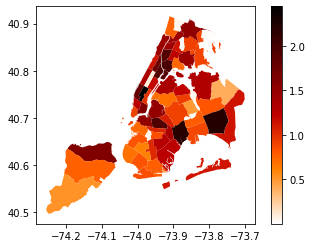

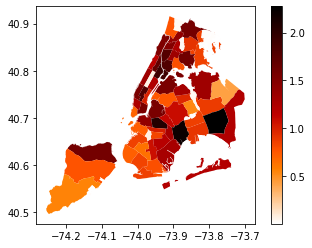

In [90]:

rci19 = crime19.plot(column='RCI', legend=True, cmap='gist_heat_r')
rci20 = crime20.plot(column='RCI', legend=True, cmap='gist_heat_r')


## Weighted Difference of RCI
variation * weight. For districts with a few crime incidents, a small increasing in total number of crimes will lead to dramatic increasing on RCI, and for ones with lots crime incidents, a small difference on RCI actually means huge increasing or decreasing. Therefore, we multiply the difference and mean of number of crime incidents of two years to get our weighted differences of RCI.

In [18]:
RCI_diff = crime20[['geometry']]
RCI_diff['diff'] = (crime20['RCI'] - crime19['RCI']) * (crime19['RCI'] + crime20['RCI']) / 2

C:\Users\zegan\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<IPython.core.display.Javascript object>


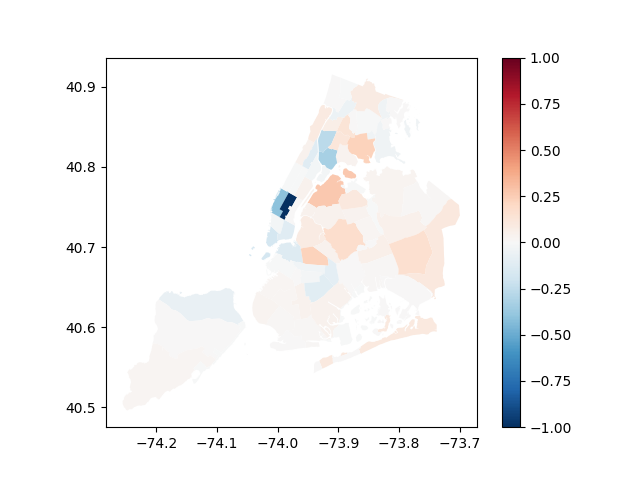

<AxesSubplot:>

In [19]:
norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)
RCI_diff.plot(column='diff', legend=True, cmap='RdBu_r', norm=norm)

It seems that Manhattan' weighted CRI decreased significantly, this might due to the "shut down"

# Covid-19

In [21]:
covid = gpd.read_file('data/covid_geo.geojson')
covid['RCI'] = crime20['RCI']
covid

,boro_cd,shape_area,shape_leng,case_num,test_num,pop_deno,death_num,geometry,RCI
0,101,42689119.0133,74168.5878924,4274,62339,88700,96,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",0.699789
1,102,37689205.9401,34130.5952768,2584,39300,53488,45,"POLYGON ((-73.99684 40.73736, -73.99362 40.736...",1.248045
2,103,46879779.2986,30695.6409632,11170,122724,186450,403,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",1.546025
3,104,49311715.1126,67623.6699012,8069,112801,159912,217,"POLYGON ((-73.99394 40.77318, -73.99370 40.773...",1.537431
4,105,43790329.8699,35288.1885095,0,0,0,0,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",1.791390
...,...,...,...,...,...,...,...,...,...
66,502,592715674.432,143044.989836,19955,110714,177265,695,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",0.767663
67,503,599053419.389,193564.186317,22539,122464,191529,469,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",0.556850
68,595,54734567.3489,110147.254437,0,0,0,0,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ...",0.005963
69,203,44803080.7253,33500.8967412,7499,51735,93192,339,"POLYGON ((-73.88072 40.83752, -73.88074 40.837...",1.335738


In [64]:
covid = covid[covid.pop_deno != 0]
covid['pos_rate'] = covid['case_num'] / covid['pop_deno']
covid['death_rate'] = covid['death_num'] / covid['pop_deno']
covid['dt_rate'] = covid['death_num'] / covid['case_num']
covid['RCI_rate'] = covid['RCI'] / covid['pop_deno']
covid['RCI_diff'] = RCI_diff['diff'] 
covid

,boro_cd,shape_area,shape_leng,case_num,test_num,pop_deno,death_num,geometry,RCI,pos_rate,death_rate,RCI_rate,RCI_diff,dt_rate,RCI_diff_rate
0,101,42689119.0133,74168.5878924,4274,62339,88700,96,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",0.699789,0.048185,0.001082,0.000008,-0.172409,0.022461,-1.943735e-06
1,102,37689205.9401,34130.5952768,2584,39300,53488,45,"POLYGON ((-73.99684 40.73736, -73.99362 40.736...",1.248045,0.048310,0.000841,0.000023,-0.026428,0.017415,-4.940910e-07
2,103,46879779.2986,30695.6409632,11170,122724,186450,403,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",1.546025,0.059909,0.002161,0.000008,-0.122207,0.036079,-6.554433e-07
3,104,49311715.1126,67623.6699012,8069,112801,159912,217,"POLYGON ((-73.99394 40.77318, -73.99370 40.773...",1.537431,0.050459,0.001357,0.000010,-0.413525,0.026893,-2.585952e-06
5,106,38732664.3228,43387.541113,6534,97395,130774,164,"MULTIPOLYGON (((-73.96128 40.73016, -73.96128 ...",0.992683,0.049964,0.001254,0.000008,0.003397,0.025099,2.597246e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,501,377253626.084,153873.506331,11430,68899,107341,309,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",1.585136,0.106483,0.002879,0.000015,-0.070705,0.027034,-6.586978e-07
66,502,592715674.432,143044.989836,19955,110714,177265,695,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",0.767663,0.112572,0.003921,0.000004,0.003448,0.034828,1.945292e-08
67,503,599053419.389,193564.186317,22539,122464,191529,469,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",0.556850,0.117679,0.002449,0.000003,0.021200,0.020808,1.106887e-07
69,203,44803080.7253,33500.8967412,7499,51735,93192,339,"POLYGON ((-73.88072 40.83752, -73.88074 40.837...",1.335738,0.080468,0.003638,0.000014,0.120862,0.045206,1.296918e-06


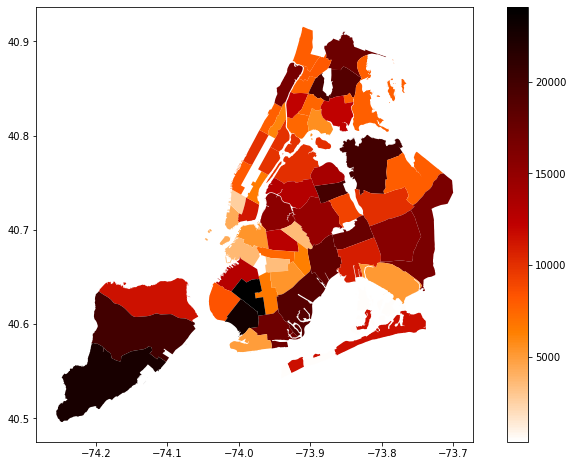

In [91]:
covid_plot = covid.plot(column='case_num', legend=True, cmap='gist_heat_r', figsize=(12, 8))

In [ ]:
%matplotlib inline
plt.scatter(covid['RCI_rate'], covid['pos_rate'])
plt.title("Relationship between RCI per Person and Positive Rate")
plt.xlabel("RCI per Person \n Correlation = -0.1152")
plt.ylabel("Positive Rate")

In [51]:
covid['RCI_rate'].corr(covid['pos_rate'])

-0.11519473550081308

## Death Rate 

Text(0, 0.5, 'Death per Positive')

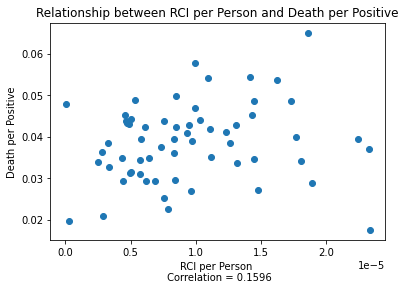

In [58]:
%matplotlib inline
plt.scatter(covid['RCI_rate'], covid['dt_rate'])
plt.title("Relationship between RCI per Person and Death per Positive")
plt.xlabel("RCI per Person \n Correlation = 0.1596")
plt.ylabel("Death per Positive")

In [59]:
covid['RCI_rate'].corr(covid['dt_rate'])

0.15958358994144967

Text(0, 0.5, 'Positive Rate')

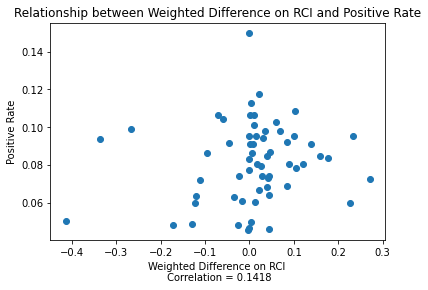

In [67]:
%matplotlib inline
plt.scatter(covid['RCI_diff'], covid['pos_rate'])
plt.title("Relationship between Weighted Difference on RCI and Positive Rate")
plt.xlabel("Weighted Difference on RCI \n Correlation = 0.1418")
plt.ylabel("Positive Rate")

In [68]:
covid['RCI_diff'].corr(covid['pos_rate'])

0.14182192632661136

Text(0, 0.5, 'Death per Positive')

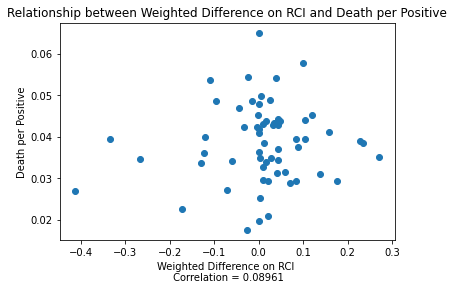

In [72]:
%matplotlib inline
plt.scatter(covid['RCI_diff'], covid['dt_rate'])
plt.title("Relationship between Weighted Difference on RCI and Death per Positive")
plt.xlabel("Weighted Difference on RCI \n Correlation = 0.08961")
plt.ylabel("Death per Positive")

In [70]:
covid['RCI_diff'].corr(covid['dt_rate'])

0.08961612292131187

## Summary
There is a little correlation between covid and crimes in general.